<a href="https://colab.research.google.com/github/tawhidul2122/Intro-Machine-Learning/blob/main/Intro_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

### Dataset <br> <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/magic/" >Link </a> 

In [2]:
# import data 
pd.read_csv("magic04.data")

,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [14]:
cols=[ 
    #since dataset entries doesn't have names create a list to assign names
    "fLength",
    "fWidth",
    "fSize",
    "fConc",
    "fConc1",
    "fAsym",
    "fM3Long",
    "fM3Trans",
    "fAlpha",
    "fDist",
    "class"
    
]

#read the file to check 
df=pd.read_csv("magic04.data", names=cols)
# assign all into a data frame & read the first five items 
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [15]:
df=pd.read_csv("magic04.data",names=cols)
# read the last 5 entires
df.tail()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h
19019,187.1814,53.0014,3.2093,0.2876,0.1539,-167.3125,-168.4558,31.4755,52.7310,272.3174,h


2 Classes of Data <b> g & h</b>

In [16]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [17]:
#convert the gamma to 1, and hedrons to 0
df["class"]=(df["class"]=="g").astype(int)
# (df["class"]=="g") // if this is true then insert 1 as integer into the column value 
# if not then it is false & 0 is being inserted into it  

In [18]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


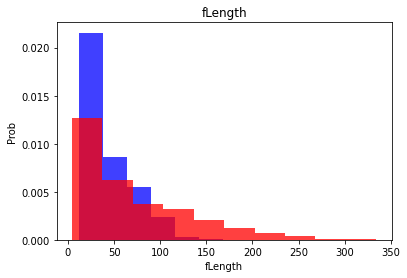

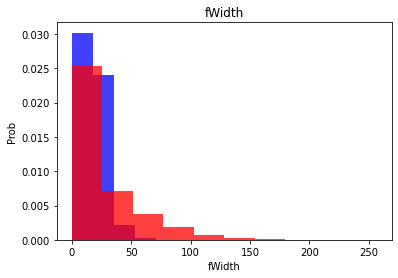

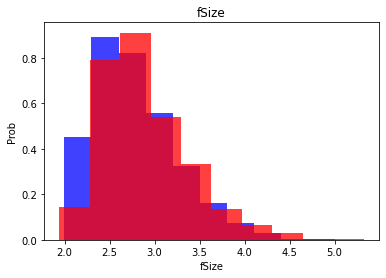

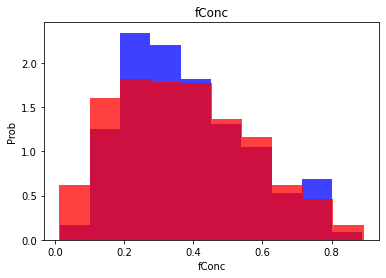

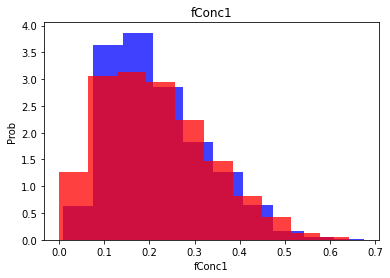

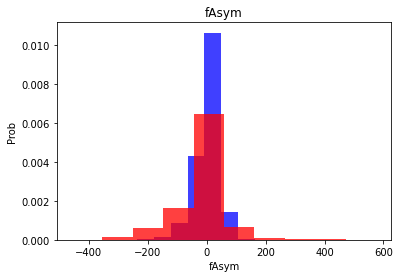

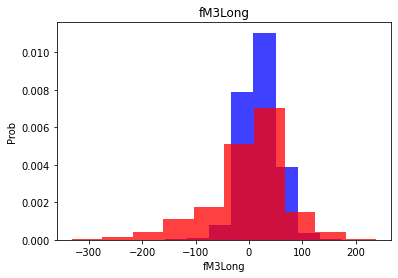

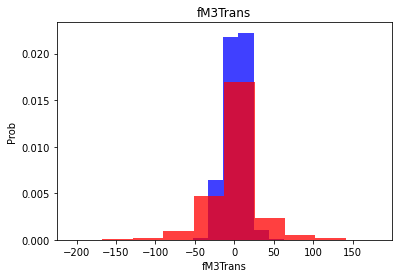

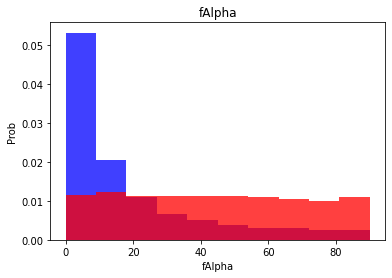

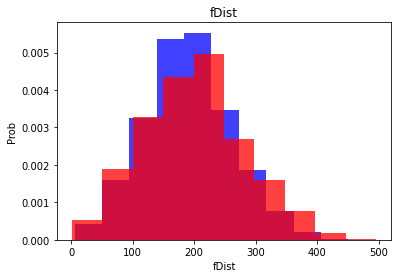

In [31]:
# 1=gamma
for col in cols[:-1]:
  plt.hist(df[df["class"]==1][col],color="blue",label="gamma",alpha=0.75,density=True)
  plt.hist(df[df["class"]==0][col],color="red",label="hadrons",alpha=0.75,density=True)
  plt.title(col)
  plt.ylabel("Prob")
  plt.xlabel(col)
  plt.legend
  plt.show()


## Train , validation, test datasets

In [48]:
train, valid,test= np.split(df.sample(frac=1),[int(0.6*len(df)), int(0.8*len(df))])

In [49]:
def scale_dataset(dataframe,oversample=False):
  X=dataframe[dataframe.columns[:-1]].values #everything upto last 
  y=dataframe[dataframe.columns[-1]].values # the last one 

  scaler=StandardScaler()
  X=scaler.fit_transform(X)

  if oversample: 
    ros=RandomOverSampler()
    X,y=ros.fit_resample(X,y)

  data=np.hstack((X,np.reshape(y,(-1,1)))) #x id 2d, y is vector of values 
  return data,X,y

In [36]:
train

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
5127,31.7448,16.9249,2.7973,0.2775,0.1475,5.1775,-17.9218,-9.5712,13.3740,236.9180,1
11554,61.5118,38.5405,3.6745,0.1466,0.0742,15.4284,53.6536,26.3400,32.6350,106.7720,1
13966,179.9872,60.3431,4.5260,0.0133,0.0011,-314.5464,138.3554,-16.6941,70.9233,147.3008,0
6889,99.1050,43.0125,4.0978,0.0933,0.0481,-49.5231,78.4080,27.7475,0.3650,290.2010,1
8401,53.5918,19.0069,2.4594,0.4236,0.2240,53.2895,42.2336,-13.5636,78.5580,103.7850,1
...,...,...,...,...,...,...,...,...,...,...,...
6339,61.3416,24.4418,3.5471,0.1549,0.0785,3.6469,60.7341,-8.9958,0.8541,186.1190,1
4664,24.5474,0.0000,2.1055,0.6980,0.3725,0.0000,0.0000,12.4542,81.1632,169.1250,1
10263,44.8332,10.5008,2.7067,0.4656,0.2485,3.4712,-34.5551,7.9535,4.9965,185.9660,1
587,51.6785,25.5782,3.0092,0.1840,0.1023,26.7409,37.5168,12.1553,1.8934,236.8500,1


In [41]:
train, X_train, y_train=scale_dataset(train,oversample=True)

In [42]:
len(y_train)

14898

In [43]:
len(X_train)

14898

In [44]:
sum(y_train==1)

7449

In [47]:
sum(y_train==0)

7449

In [50]:
train, X_train, y_train=scale_dataset(train,oversample=True)
valid, X_valid, y_valid=scale_dataset(valid,oversample=False)
test, X_test, y_test=scale_dataset(test,oversample=False)
 # test is false & validation is false , no need to oversample them 
 

### Models 
## KNN-  K Nearest Neighbours